Shape of dataset: (7789, 11)

Column Names: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

Missing Values:
 Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

First 5 Rows:
   Show_Id Category     Title           Director  \
0      s1  TV Show      0.03                NaN   
1      s2    Movie  07:19:00  Jorge Michel Grau   
2      s3    Movie  23:59:00       Gilbert Chan   
3      s4    Movie         9        Shane Acker   
4      s5    Movie        21     Robert Luketic   

                                                Cast        Country  \
0  JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...         Brazil   
1  DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...         Mexico   
2  Tedd Chan, Stella Chung, Henle

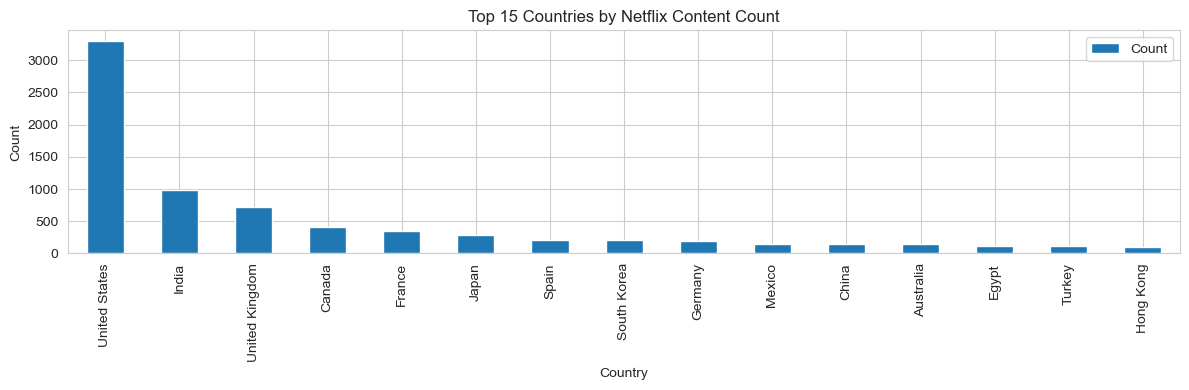


✅ Analysis Completed Successfully!
📁 Files Saved:
 - netflix_type_year.csv
 - netflix_top_genres.csv
 - netflix_top_countries.csv


In [2]:
# --------------------------------------------------------------
# 📊 Netflix Dataset Analysis - Major Project (Python Code)
# --------------------------------------------------------------

# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------------------------------------
# 1️⃣ Load Dataset
# --------------------------------------------------------------

# Provide the correct path to your dataset file
file_path = r"C:\Users\supar\OneDrive\Documents\Netflix Dataset.csv.xlsx"  # Change path if needed

# Read Excel file
df = pd.read_excel(file_path)

# --------------------------------------------------------------
# 2️⃣ Basic Dataset Overview
# --------------------------------------------------------------

print("Shape of dataset:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())
print("\nFirst 5 Rows:\n", df.head())

# --------------------------------------------------------------
# 3️⃣ Data Preprocessing
# --------------------------------------------------------------

# Convert column names to lowercase for consistency
df.columns = df.columns.str.lower().str.strip()

# Extract release year if not available
if 'release_year' not in df.columns:
    if 'date_added' in df.columns:
        df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
        df['release_year'] = df['date_added'].dt.year
    else:
        print("⚠️ No release_year or date_added column found.")

# --------------------------------------------------------------
# 4️⃣ Define Key Columns
# --------------------------------------------------------------

type_col = 'type' if 'type' in df.columns else None
genre_col = None
for c in ['listed_in', 'genres', 'genre']:
    if c in df.columns:
        genre_col = c
        break
country_col = 'country' if 'country' in df.columns else None

# --------------------------------------------------------------
# 5️⃣ Analysis 1: Movies vs TV Shows over Years
# --------------------------------------------------------------

if type_col and 'release_year' in df.columns:
    type_year = df[[type_col, 'release_year']].dropna()
    type_year = type_year.groupby(['release_year', type_col]).size().reset_index(name='count')

    # Visualization
    pivot = type_year.pivot(index='release_year', columns=type_col, values='count').fillna(0)
    pivot.plot(kind='bar', stacked=True, figsize=(12,5))
    plt.title('Movies vs TV Shows by Release Year')
    plt.xlabel('Release Year')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

    # Save
    type_year.to_csv("netflix_type_year.csv", index=False)
else:
    print("⚠️ Type or Release Year column not found — skipping this analysis.")

# --------------------------------------------------------------
# 6️⃣ Analysis 2: Top Genres
# --------------------------------------------------------------

if genre_col:
    genres = df[[genre_col]].dropna()
    genres[genre_col] = genres[genre_col].astype(str).str.split(',')
    genres = genres.explode(genre_col)
    genres[genre_col] = genres[genre_col].str.strip()
    top_genres = genres[genre_col].value_counts().reset_index()
    top_genres.columns = ['Genre', 'Count']

    # Visualization
    top_genres.head(15).set_index('Genre').plot(kind='bar', figsize=(10,4))
    plt.title('Top 15 Genres on Netflix')
    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

    # Save
    top_genres.to_csv("netflix_top_genres.csv", index=False)
else:
    print("⚠️ Genre column not found — skipping genre analysis.")

# --------------------------------------------------------------
# 7️⃣ Analysis 3: Top Countries
# --------------------------------------------------------------

if country_col:
    countries = df[[country_col]].dropna()
    countries[country_col] = countries[country_col].astype(str).str.split(',')
    countries = countries.explode(country_col)
    countries[country_col] = countries[country_col].str.strip()
    top_countries = countries[country_col].value_counts().reset_index()
    top_countries.columns = ['Country', 'Count']

    # Visualization
    top_countries.head(15).set_index('Country').plot(kind='bar', figsize=(12,4))
    plt.title('Top 15 Countries by Netflix Content Count')
    plt.xlabel('Country')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

    # Save
    top_countries.to_csv("netflix_top_countries.csv", index=False)
else:
    print("⚠️ Country column not found — skipping country analysis.")

# --------------------------------------------------------------
# 8️⃣ Summary Output
# --------------------------------------------------------------

print("\n✅ Analysis Completed Successfully!")
print("📁 Files Saved:")
print(" - netflix_type_year.csv")
print(" - netflix_top_genres.csv")
print(" - netflix_top_countries.csv")
